This notebook explains how to deal with NaNs in financial time series. NaN stands for "not a number" and it is basically an invalid entry in an array or list. Before we start, let's import some packages and create an array of 20 random numbers.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader

In [2]:
# Daily closing price data for Nvidia
data = pandas_datareader.get_data_yahoo('NVDA', '2020-01-01', '2020-02-28')['Close']

In [3]:
# Detecting if there's any null values
data[data.isnull()]

Series([], Name: Close, dtype: float64)

In [4]:
data.isnull().sum()

0

Since we didn't have any missing value in our data, we turn one of the elements into a NaN.

In [5]:
data['2020-01-27'] = np.nan

In [6]:
type(data['2020-01-27'])

numpy.float64

Note that np.nan is of type float64, and it is not a __None__ type. This is important as Python does not regard NaNs as __False__ as it does for example with the __None__ type, empty lists or zeros.

In order to catch a NaN we need to explicitely identify it as such:

In [7]:
# Convert the Pandas series to a Numpy array:
data_np = data.to_numpy()

In [8]:
for i in data_np:
    if np.isnan(i):
        print('This is a NaN:', i, type(i))

This is a NaN: nan <class 'numpy.float64'>


In [9]:
data_np.sum()

nan

When we plot them, we can see that our NaN value is missing.

In [10]:
data.plot();

NaNs can be a bit annoying as they often produce exceptions when our code is run. We should try to avoid them. But the question is, what should and should we __not__ do in order to deal with this? 

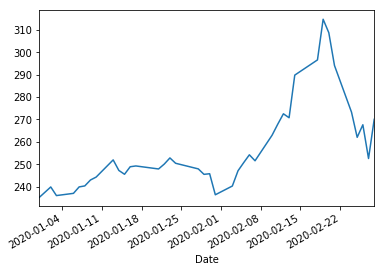

In [11]:
data.dropna().plot();

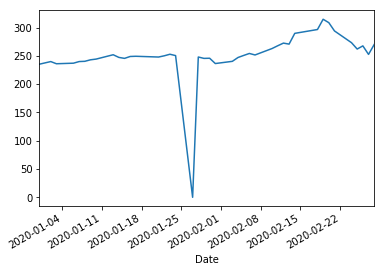

In [12]:
data.fillna(0).plot();

When it comes to prices we need to do a different kind of fill, a so-called forward-fill. What we do here is to draw the previous days' price to today, which is the same as saying our latest return is zero. Let's have a look at the below:

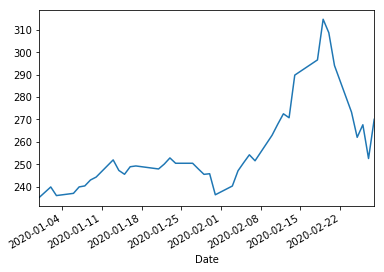

In [13]:
data.ffill().plot();

We can see that our price curve now looks smooth as expected. The reason why we use the previous price and not the next price is to avoid looking into the future. 

### Working with returns

In [14]:
ret = data.ffill().pct_change()

In order to deal with the missing value, we simply use the Pandas fillna() function and set the return to zero, assuming that this particular day did not make a profit or loss. Now, our series is complete. 

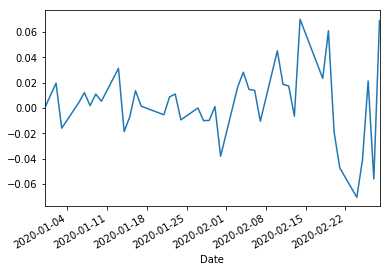

In [15]:
ret.fillna(0).plot();

#### Question:
How about calculating the missing price as the mean between the previous and the next price?

#### Answer:
Not good, because this would make the price curve look very smooth but it would also introduce a look-forward bias since we use a future price to calculate our missing value.